In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
np.random.seed(1944790021)

In [3]:
nrows = 3
ncols = 2

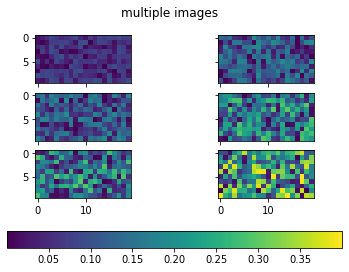

In [4]:
fig, axs = plt.subplots(nrows, ncols)
fig.suptitle("multiple images")

images = []
for i in range(nrows):
    for j in range(ncols):
        # generate data with a range that varies from one plot to the next
        data = ((1 + i + j) / 10) * np.random.rand(10, 20)
        images.append(axs[i, j].imshow(data))
        axs[i, j].label_outer()

# find the min and max of all colors for use in setting the color scale
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)

for im in images:
    im.set_norm(norm)

fig.colorbar(images[0], ax=axs, orientation="horizontal", fraction=0.1)

# make images respond to changes in the norm of other images (e.g. via the "edit axis,
# curves and images parameters" GUI on Qt), but be careful not to recurse infinitely!
def update(changed_image, images):
    for im in images:
        if (
            changed_image.get_cmap() != im.get_cmap() or
            changed_image.get_clim() != im.get_clim()
        ):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())

for im in images:
    im.callbacks.connect("changed", update)

plt.show()